In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head() #default 5 row
df.shape #cek dimensi
df.info() #cek info tipe data dll
df.isnull().sum() #cek missing value
df.describe() #cek statistik deskriptif

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


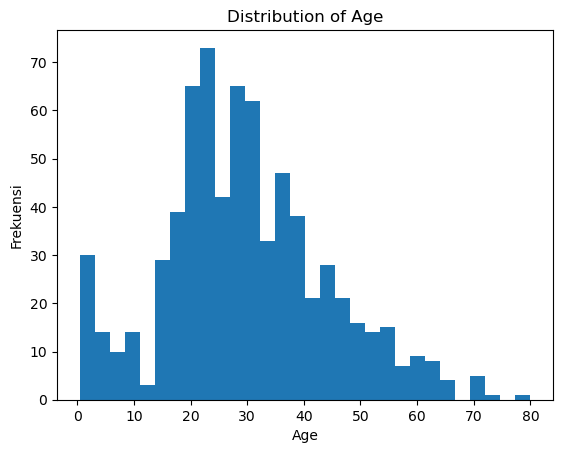

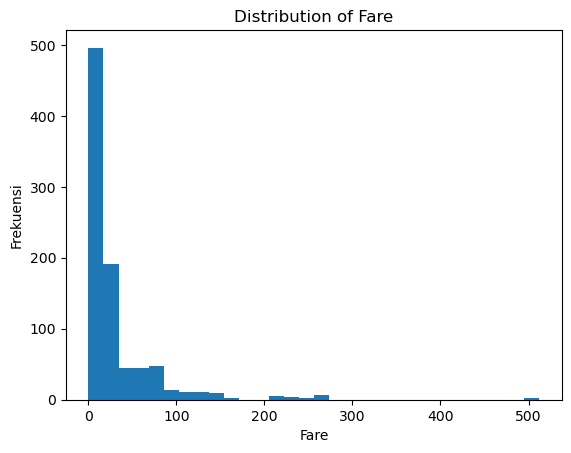

In [11]:
#Langkah 3 - Inspeksi Visual

#distribusi
num_cols = ['Age', 'Fare']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

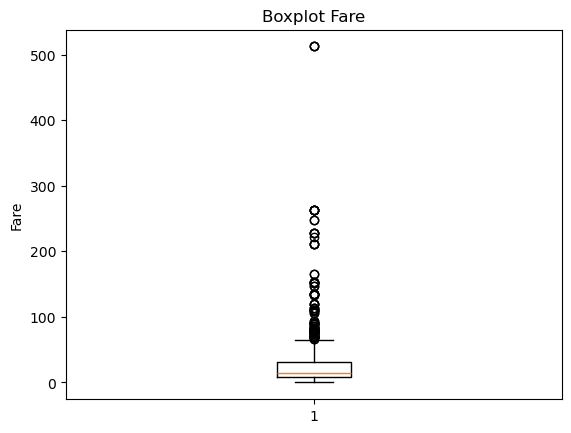

In [12]:
#Inspeksi outlier
plt.figure()
plt.boxplot(df['Fare'].dropna(), vert=True)
plt.title('Boxplot Fare')
plt.ylabel('Fare')
plt.show()

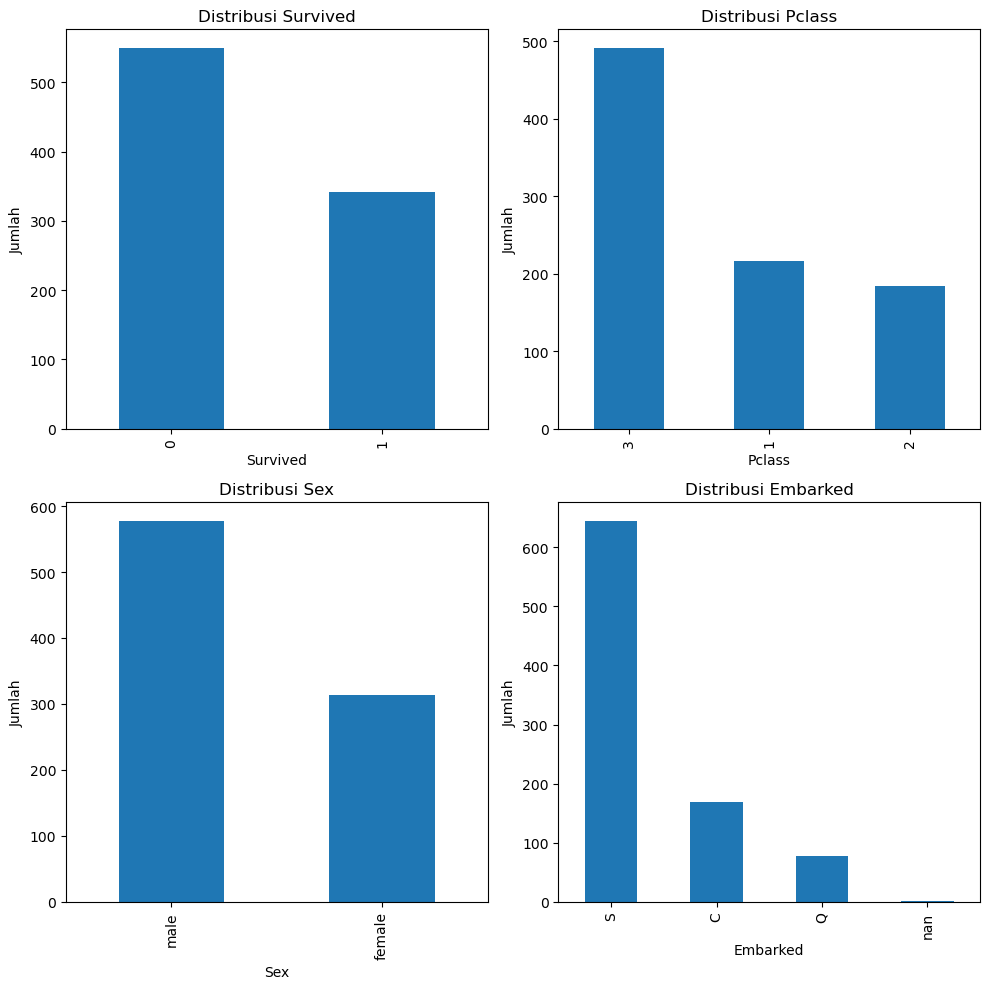

In [14]:
#Inspeksi Komposisi Variabel Kualitatif

cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()

for i, col, in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

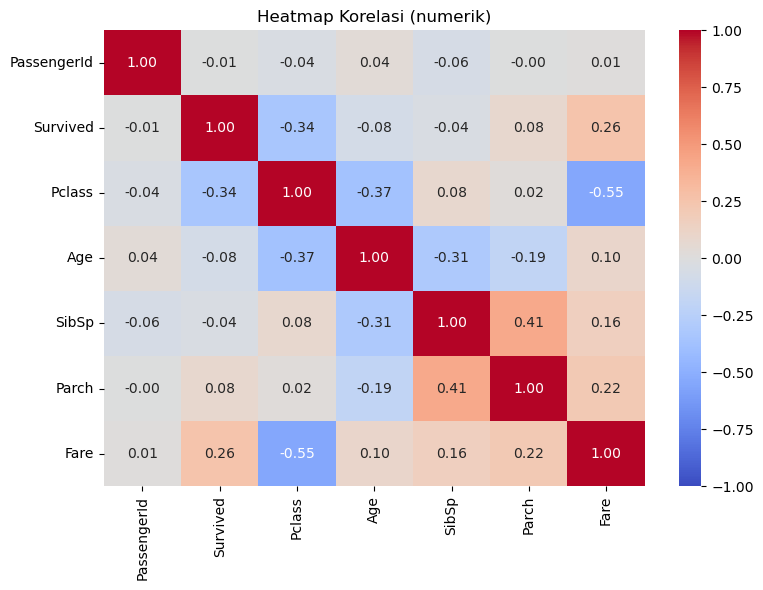

Secara ringkat kita juga dapat melakukan inspeksi korelasi dengan hasil data tabular. 


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [18]:
#Heatmap
import seaborn as sns #enhanced visualisasi

num_only = df.select_dtypes(include=[np.number])
corr = num_only.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()

print("Secara ringkat kita juga dapat melakukan inspeksi korelasi dengan hasil data tabular. ")
corr['Survived'].sort_values(ascending=False)

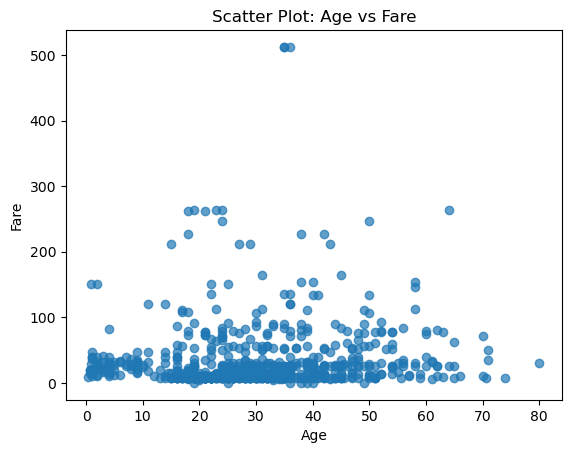

In [19]:
#Scatter Plot

plt.figure()
surv_map = {
    0: 'no',
    1: 'yes'
}
plt.scatter(df['Age'], df['Fare'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.show()
